# Filter GRNs based on quantile


In [1]:
#Import packages
import os
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 20)

In [4]:
#Load GRNs
GRNBoost = pd.read_csv("/home/spere5/Documents/BALL_project/BALL_git_results/GRNs/GRN_GRNBoost.csv", index_col=0)
Panda = pd.read_csv("/home/spere5/Documents/BALL_project/BALL_git_results/GRNs/GRN_Panda.csv", sep=" ")


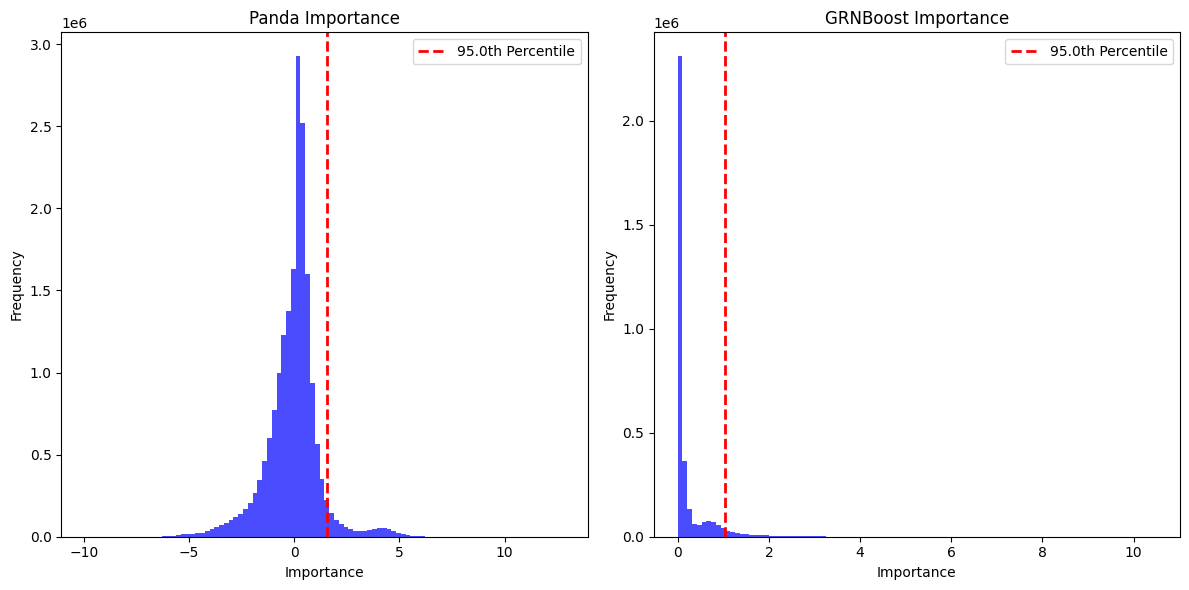

In [9]:
#Plot distribtion of score
# Define the quantile threshold
quantile_threshold = 0.95

# Calculate the quantile values
panda_quantile = Panda["importance"].quantile(quantile_threshold)
grnboost_quantile = GRNBoost["importance"].quantile(quantile_threshold)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot Panda histogram and quantile line
axes[0].hist(Panda["importance"], bins=100, color="blue", alpha=0.7)
axes[0].axvline(panda_quantile, color="red", linestyle="dashed", linewidth=2, label=f"{quantile_threshold*100}th Percentile")
axes[0].set_title("Panda Importance")
axes[0].set_xlabel("Importance")
axes[0].set_ylabel("Frequency")
axes[0].legend()

# Plot GRNBoost histogram and quantile line
axes[1].hist(GRNBoost["importance"], bins=100, color="blue", alpha=0.7)
axes[1].axvline(grnboost_quantile, color="red", linestyle="dashed", linewidth=2, label=f"{quantile_threshold*100}th Percentile")
axes[1].set_title("GRNBoost Importance")
axes[1].set_xlabel("Importance")
axes[1].set_ylabel("Frequency")
axes[1].legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [19]:
#Define function to filter by quantile

def filter_by_quantile(df, column, quantile_threshold):
    """
    Filters a DataFrame based on a quantile threshold of a specified column.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to filter.
        column (str): The column name to compute the quantile.
        quantile_threshold (float): The quantile threshold (0 to 1).
        
    Returns:
        pd.DataFrame: A filtered DataFrame with rows exceeding the quantile threshold.
    """
    # Calculate the quantile value
    quantile_value = df[column].quantile(quantile_threshold)
    
    # Filter the DataFrame
    filtered_df = df[df[column] > quantile_value]
    
    return filtered_df


In [26]:
#Filter networks
GRNBoost_fil = filter_by_quantile(GRNBoost,"importance",0.95)

In [28]:
Panda_fil = filter_by_quantile(Panda, "importance",0.95)

In [30]:
#Save filtered networks
os.chdir("/home/spere5/Documents/BALL_project/BALL_git_results/GRNs")
GRNBoost_fil.to_csv("GRNBoost_fil.csv")
Panda_fil.to_csv("Panda_fil.csv")